<a href="https://colab.research.google.com/github/brandon-setegn/data-mining-business-analytics/blob/master/Chapter3_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization

In [2]:
import os
import calendar
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Development/machine_learning/dmba')

Mounted at /content/drive


In [6]:
# Boston Housing Dataset
housing_df = pd.read_csv('BostonHousing.csv',index_col=False)
# rename CAT. MEDV column for easier data handling
housing_df = housing_df.rename(columns={'CAT. MEDV':'CAT_MEDV'})

| Column | Description |
| --- | ----------- |
| CRIM | Crime rate |
| ZN | Percentage of residential land zoned for lots over 25,000 ft2 |
| INDUS | Percentage of land occupied by nonretail business |
|CHAS | Does tract bound Charles River (=1 if tract bounds river, =0 otherwise) |
|NOX | Nitric oxide concentration (parts per 10 million) |
|RM | Average number of rooms per dwelling |
|AGE | Percentage of owner occupied units built prior to 1940 |
|DIS | Weighted distances to five Boston employment centers |
|RAD | Index of accessibility to radial highways |
|TAX | Full_value property tax rate per \$10,000 |
|PTRATIO |  Pupil to teacher ratio by town |
|LSTAT |  Percentage of lower status of the population |
|MEDV |  Median value of owner occupied homes in \$1000s |
|CAT.MEDV | Is median value of owner occupied homes in tract above \$30000
\(CAT.MEDV = 1\) or not \(CAT.MEDV = 0\) |


In [7]:
housing_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,0


In [20]:
# Amtrak Dataset
amtrak_df = pd.read_csv('Amtrak.csv').squeeze()
amtrak_df['Date'] = pd.to_datetime(amtrak_df.Month, format='%d/%m/%Y')
ridership_ts = pd.Series(amtrak_df.Ridership.values, index=amtrak_df.Date)

amtrak_df

,Month,Ridership,Date
0,01/01/1991,1708.917,1991-01-01
1,01/02/1991,1620.586,1991-02-01
2,01/03/1991,1972.715,1991-03-01
3,01/04/1991,1811.665,1991-04-01
4,01/05/1991,1974.964,1991-05-01
...,...,...,...
154,01/11/2003,2076.054,2003-11-01
155,01/12/2003,2140.677,2003-12-01
156,01/01/2004,1831.508,2004-01-01
157,01/02/2004,1838.006,2004-02-01


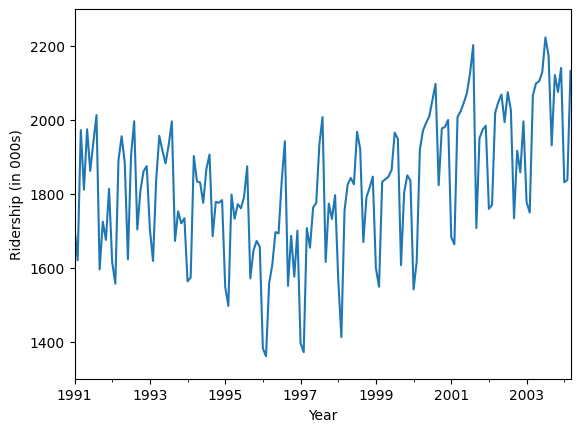

In [22]:
# Pandas - line graph
ridership_ts.plot(ylim=[1300,2300], legend=False)
plt.xlabel('Year')
plt.ylabel('Ridership (in 000s)')
plt.show()

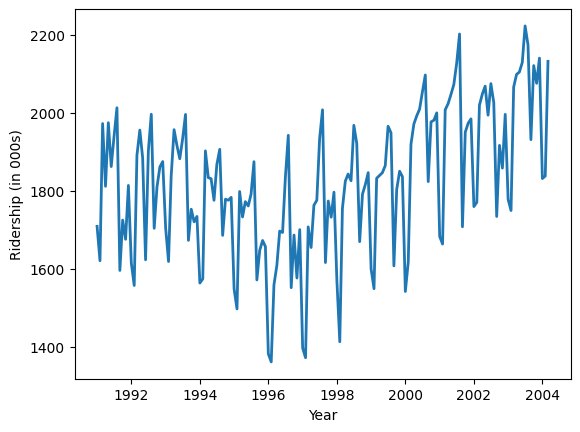

In [23]:
# matplotlib line graph
plt.plot(ridership_ts.index.values, ridership_ts.values, linewidth=2)
plt.xlabel('Year')
plt.ylabel('Ridership (in 000s)')
plt.show()

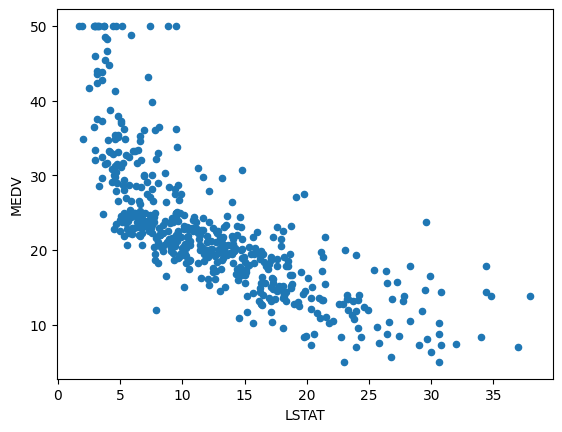

In [28]:
# pandas scatter plot with axes names
housing_df.plot.scatter(x='LSTAT', y='MEDV', legend=False)
plt.show()

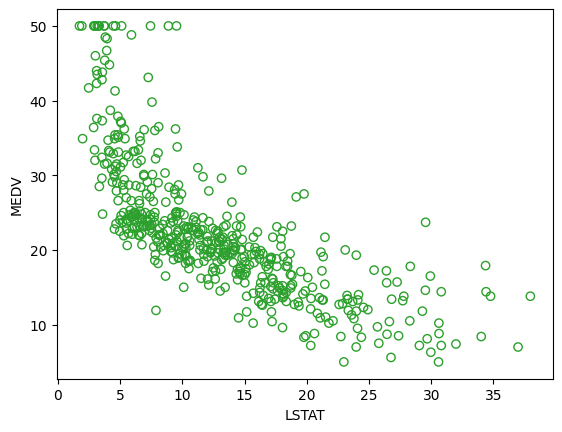

In [31]:
# matplotlib scatter plot with open circles and a color
plt.scatter(housing_df.LSTAT, housing_df.MEDV, marker='o', color='C2', facecolor='none')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

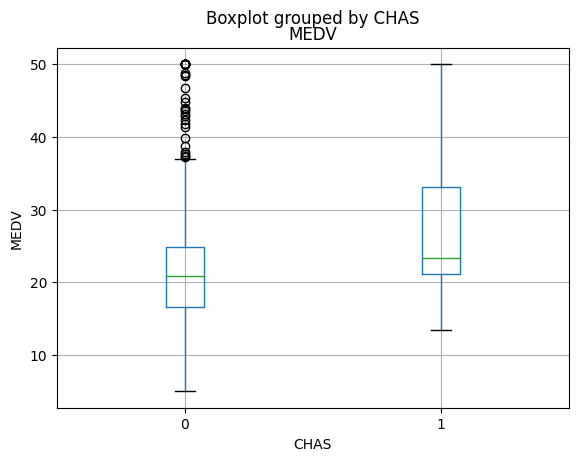

In [33]:
# Box Plot
ax = housing_df.boxplot(column='MEDV', by='CHAS')
ax.set_xlabel('CHAS')
ax.set_ylabel('MEDV')
plt.show()

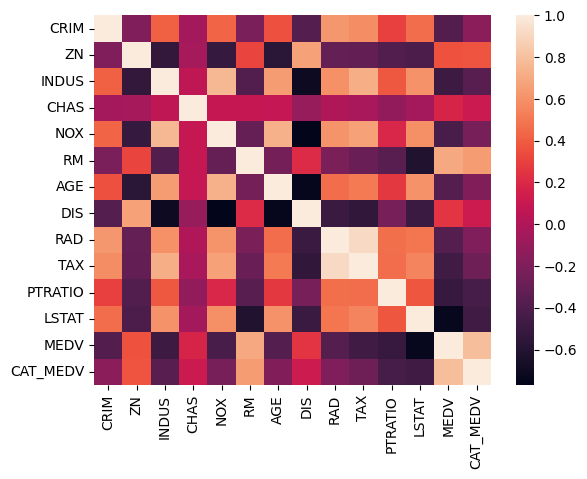

In [35]:
# simple heatmap of correlations (whithout values)
corr = housing_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

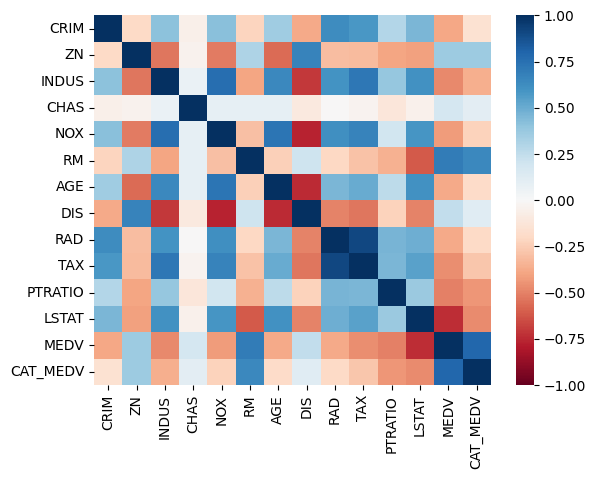

In [38]:
# Change the colormap to a divergent scale and fix the range of the colormap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu', vmin=-1, vmax=1)
plt.show()

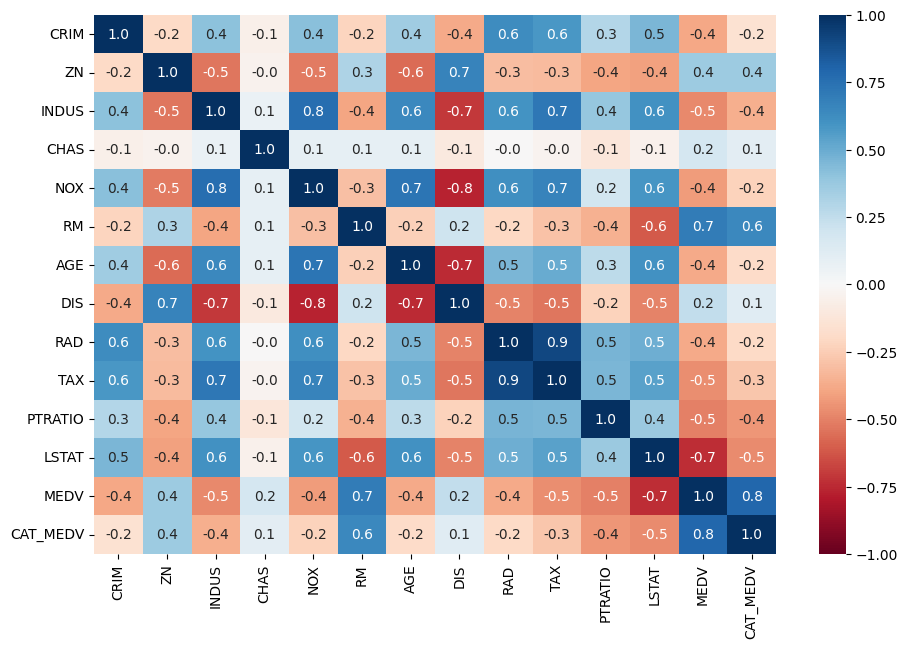

In [43]:
# also include information about values (example demonstrate how to control the size of the plot)
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu', vmin=-1, vmax=1, annot=True, fmt='.1f')
plt.show()

In [44]:
import plotly.express as px

fig = px.imshow([[1, 20, 30],
                 [20, 1, 60],
                 [30, 60, 1]])
fig.show()